# Thesis Codes  by Korkut Anapa

# Chapter 3 Codes

# A STATISTICAL MODELLING OF A DISHWASHER CLEANING CYCLE

## Prediction Model

This is a code to predict the CPI, DPI, EC, WC and T of the cleaning cycle of a DW.


In [1]:
from catboost import CatBoostRegressor
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.compose import make_column_selector as selector
from sklearn.cross_decomposition import PLSRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import statsmodels.api as sm
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

### preparing the data 

In [124]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_60.xlsx')

In [125]:
indvar=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [126]:
data=['CPI','DPI','EC','T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [127]:
df=df_ref[data]

df is our reference data. It consists of all the experiments of 60cm dishwashers

In [128]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,3.238150,86.705202,0.855000,225.000000,9.606667,0,24,21,4.0,2800,...,0,0,0,0,10,78,1,0,0,0
1,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
2,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


the statistical summary of output data as in the report

In [129]:
y_CPI = df['CPI']
y_DPI = df['DPI']
y_EC=df['EC']
y_T=df['T']
y_WC=df['WC']

In [130]:
y_CPI.describe()

count    154.000000
mean       3.287778
std        0.226735
min        2.290000
25%        3.274000
50%        3.327080
75%        3.370500
max        3.580000
Name: CPI, dtype: float64

In [131]:
y_DPI.describe()

count    154.000000
mean      79.913332
std       15.151414
min       15.000000
25%       81.000000
50%       84.000000
75%       86.095376
max       92.301325
Name: DPI, dtype: float64

In [132]:
y_EC.describe()

count    154.000000
mean       0.874302
std        0.149146
min        0.500000
25%        0.800500
50%        0.856667
75%        0.949250
max        1.220000
Name: EC, dtype: float64

In [133]:
y_WC.describe()

count    154.000000
mean      10.574918
std        1.912754
min        6.793333
25%        9.500000
50%        9.900000
75%       11.427500
max       17.600000
Name: WC, dtype: float64

In [134]:
y_T.describe()

count    154.000000
mean     206.053301
std       66.297071
min       30.000000
25%      205.000000
50%      227.333333
75%      243.562500
max      297.000000
Name: T, dtype: float64

# check for duplicates

In [135]:
df_ver_0=df.drop_duplicates(keep='last',subset=indvar)

In [136]:
df_ver_0

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
5,3.270000,81.176000,0.570000,275.000000,9.480000,8,54,49,4.8,2800,...,0,0,0,0,30,80,1,38,0,0
6,3.300000,77.647000,0.580000,250.000000,9.410000,8,54,49,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
8,3.270000,82.824000,0.650000,250.000000,9.770000,8,55,49,7.1,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


In [137]:
df_ver_0_X=df_ver_0[indvar]

In [138]:
df_ver_0_X

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of ZONE_C,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,0,...,0,0,0,0,50,57,1,30,0,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,0,...,0,0,0,0,30,80,1,38,0,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,102,0,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,20,73,0,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,123,0,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,10,98,0,37,0,0


In [139]:
y_CPI = df_ver_0['CPI']
y_DPI = df_ver_0['DPI']
y_EC=df_ver_0['EC']
y_T=df_ver_0['T']
y_WC=df_ver_0['WC']

## Variance Analysis

In [140]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
var_thr.fit(df_ver_0_X)
var_thr.get_support()
concol = [column for column in df_ver_0_X.columns 
          if column not in df_ver_0_X.columns[var_thr.get_support()]]
df_ver_1=df_ver_0_X.drop(concol,axis=1)
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

In [141]:
df_ver_1

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of BEKLEME,...,8DSBSum of kapalı,8DSBSum of SURE,8DSBSum of CIRC_TIME,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,2,...,0,0,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,2,...,0,0,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,109,10,98,0,37,0


In [142]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_1
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 47

Determinant: 2.9627003360027487e+47

Condition Number : 2.4006733409240366e+21


In [143]:
df_ver_2=df_ver_1

In [144]:
correlation_matrix=df_ver_2.corr()
correlated_features = set()

In [145]:
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

dataset 1 is df_ver_1 and dataset 2 is df_ver_3

In [146]:
df_ver_3 = df_ver_2.drop(labels=correlated_features, axis=1)
df_ver_3

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of kapalı,...,7SCD2Sum of ALT_C,7SCD2Sum of ÜST_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
3,2,48,43,4.8,2800,53,14.6,7.8,2,0,...,4.5,5.5,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,7.8,2,3,...,4.5,6.5,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,0.0,0,0,...,24.0,24.0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,12.0,8.0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,11.0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,4.0,0,0,...,8.0,7.0,0,0,109,10,98,0,37,0


In [147]:
df_ver_1

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of BEKLEME,...,8DSBSum of kapalı,8DSBSum of SURE,8DSBSum of CIRC_TIME,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,2,...,0,0,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,2,...,0,0,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,109,10,98,0,37,0


In [148]:
df_ver_3.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '8DSBSum of kapalı', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')

In [149]:
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

In [150]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_3
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 37

Determinant: 6.136095300543292e+107

Condition Number : 114393.38196482755


In [151]:
outputs = [ y_CPI, y_DPI , y_EC, y_WC, y_T]
for x in outputs:
    model_LR_1 = LinearRegression()
    model_LR_1.fit(df_ver_1, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_LR_1,df_ver_1, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR_1,df_ver_1, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.28 -862
 14.25 -1342
 0.16 -638
 1.39 -119
 10.38 85


In [152]:
for x in outputs:
    model_LR = LinearRegression()
    model_LR.fit(df_ver_3, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores1 = cross_val_score(model_LR,df_ver_3, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR,df_ver_3, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.16 -803
 8.26 -190
 0.06 67
 0.68 69
 5.76 98


This is the improvement of colinearity problem

In [ ]:
We have df_ver_0 94*165 df_ver_1 94*49 df_ver_3 94*37

# Feature Selection Codes

In [68]:
import matplotlib.pyplot as plt
import datetime

## Feature Selection by Select k Best f-regression with Linear Regression 

### CPI

In [349]:
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)


Text(0, 0.5, 'MAE')

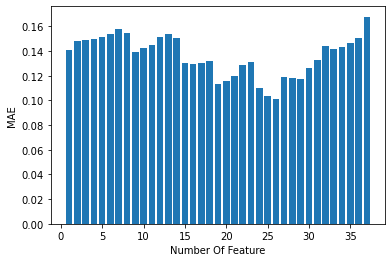

In [286]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')       

Text(0, 0.5, 'R2')

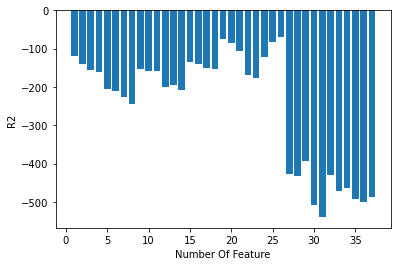

In [287]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [288]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=26)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))


 0.101 -69.545


### DPI

In [289]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

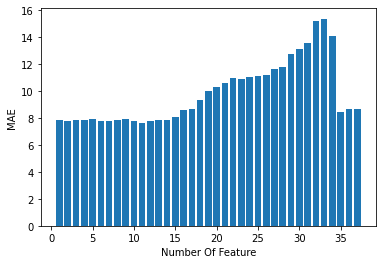

In [290]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

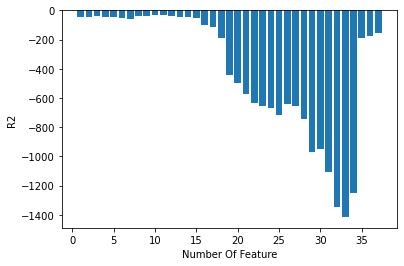

In [291]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [292]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=10)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))


 7.772 -32.460


### EC

In [264]:
X=df_ver_3
y=y_EC_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

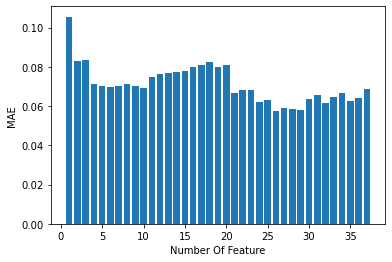

In [265]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

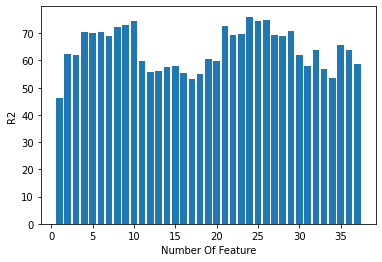

In [266]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [269]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=29)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.058 70.768


### WC

In [270]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

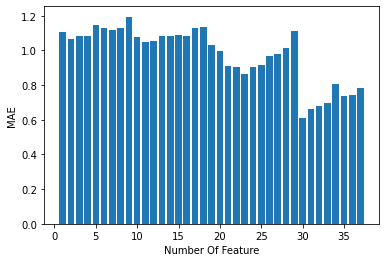

In [271]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

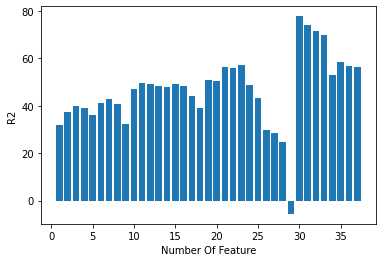

In [272]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [273]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=30)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.608 77.655


### T

In [274]:
X=df_ver_3
y=y_T_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

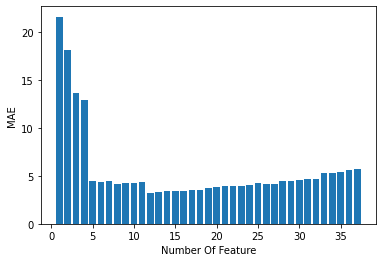

In [275]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

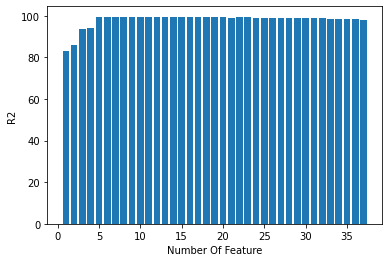

In [276]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [277]:
        from sklearn.feature_selection import SelectKBest, f_regression
        selector = SelectKBest(f_regression, k=11)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 4.351 99.351


## Feature Selection by Genetic Selection with Linear Regression 

### CPI

In [69]:
X = df_ver_3
y = y_CPI
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of SURE', '2AYSum of kapalı', '2AYSum of WI', '2AYMax of DEVIR',
       '2AYMax of TEMP', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Max of DEVIR', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '10KUSum of SURE', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')
 0.079 64.240


### DPI

In [70]:
X = df_ver_3
y = y_DPI
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of CIRC_TIME', '1OYSum of WI', '1OYSum of TEPE_C',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR',
       '2AYMax of TEMP', '2AYSum of TEPE_C', '4SGDSum of WI',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '7SCD2Sum of kapalı',
       '7SCD2Max of DEVIR', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of KAPI ACMA'],
      dtype='object')
 4.008 59.553


### EC

In [72]:
X = df_ver_3
y = y_EC
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYSum of ALT_C', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYMax of TEMP', '2AYSum of ALT_C', '2AYSum of TEPE_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA'],
      dtype='object')
 0.043 88


### WC

In [73]:
X = df_ver_3
y = y_WC
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP',
       '2AYSum of kapalı', '2AYSum of WI', '2AYMax of DEVIR',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Sum of ALT_C', '8DSBSum of kapalı', '10KUSum of SURE',
       '10KUSum of GAUDI_offset'],
      dtype='object')
 0.408 89


### T

In [75]:
X = df_ver_3
y = y_T
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=500, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=200,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of SURE', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of ALT_C', '4SGDSum of WI',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '8DSBSum of kapalı',
       '10KUSum of SURE'],
      dtype='object')
 2.841 100


Genetic Algorithm Performs Better on feature selection for linear regression models. this improve the importance of feature selection

## Feature Selection by Sequential Backward or Forward Methods with Linear Regression

In [322]:
from sklearn.feature_selection import SequentialFeatureSelector

### BACKWARD

### CPI

In [324]:
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

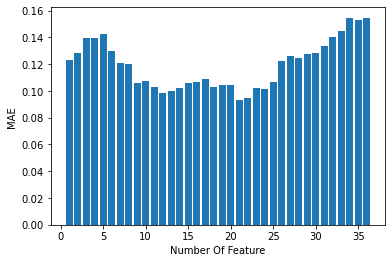

In [325]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

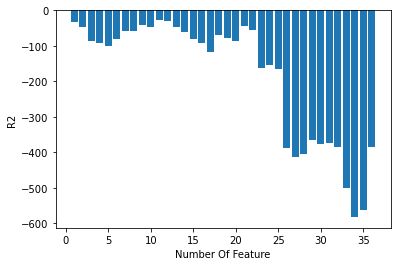

In [326]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [328]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 21, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.093 -43.274


### DPI

In [329]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

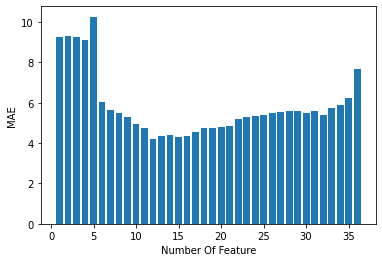

In [330]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

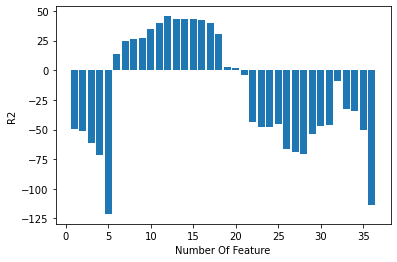

In [331]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [332]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 11, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 4.749 40.189


### EC

In [333]:
X=df_ver_3
y=y_EC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

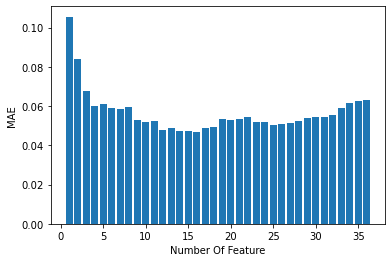

In [334]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

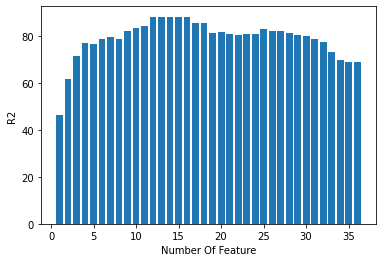

In [335]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [336]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 15, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.047 88.214


### WC

In [341]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

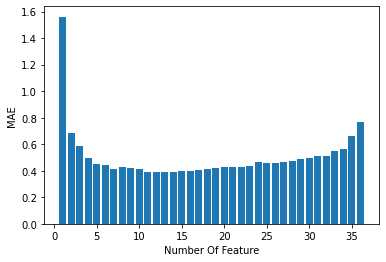

In [342]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

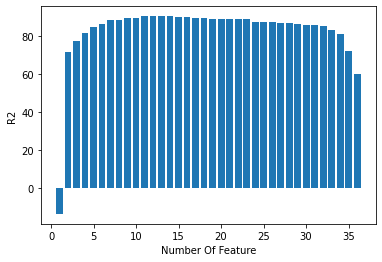

In [343]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [344]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 10, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.416 89.226


### T

In [345]:
X=df_ver_3
y=y_T
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

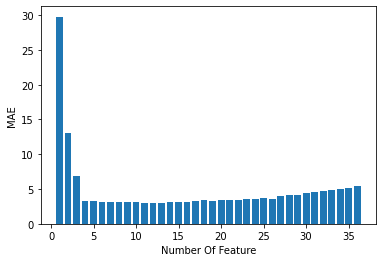

In [346]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

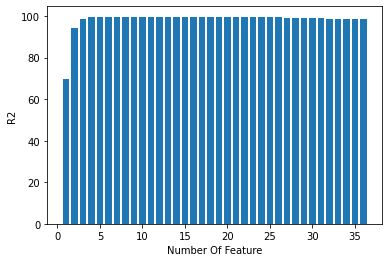

In [347]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [348]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 5, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 3.256 99.530


Since the prediction results for EC,T and WC are acceptable with LR model and the improvement with FS is clear we end up the studies for WC,T and EC here. Also the selected features by genetic algorithm is reasonable according to the doman expert. 

we try to improve the prediction performance of CPI and DPI with a target of MAE and R2

## Feature Selection by  Shrinkage Methods

### CPI

In [78]:
y=y_CPI
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 0.137 -58
>Lasso 0.137 -45
>Lasso 0.116 -22
>Lasso 0.107 -32
>Ridge 0.114 -48
>Ridge 0.125 -102
>Ridge 0.155 -331
>Ridge 0.172 -1840
>ElasticNet 0.134 -52
>ElasticNet 0.134 -53
>ElasticNet 0.136 -57
>ElasticNet 0.120 -15
>ElasticNet 0.136 -27
>ElasticNet 0.137 -38
>ElasticNet 0.117 -36
>ElasticNet 0.114 -26
>ElasticNet 0.115 -24
>ElasticNet 0.103 -33
>ElasticNet 0.101 -6
>ElasticNet 0.104 -16


### DPI

In [79]:
y=y_DPI
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 7.748 -14
>Lasso 7.809 -44
>Lasso 6.039 -6
>Lasso 7.747 -101
>Ridge 7.121 -30
>Ridge 6.792 -46
>Ridge 8.074 -113
>Ridge 9.021 -254
>ElasticNet 7.484 -19
>ElasticNet 7.564 -15
>ElasticNet 7.661 -14
>ElasticNet 7.627 -31
>ElasticNet 7.688 -37
>ElasticNet 7.717 -41
>ElasticNet 7.018 -31
>ElasticNet 6.809 -30
>ElasticNet 6.555 -23
>ElasticNet 6.804 -62
>ElasticNet 6.962 -76
>ElasticNet 7.227 -87


# NON LINEARITY PROBLEM 

first we try to solve the cpi and dpi wo using fs

### CPI df_ver_3 37 features

In [88]:
y=y_CPI
X=df_ver_3

def get_models():
	models = dict()
	models['GBR'] = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
	models['RFR'] = RandomForestRegressor(n_estimators = 100)
	models['KNN']= KNeighborsRegressor(n_neighbors=3)
	models['XGB']= XGBRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 4)
	return models

def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_model2(model, X, y):
	cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores2

models = get_models()
results, names = list(), list()
for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))


>GBR 0.063 67
>RFR 0.065 67
>KNN 0.094 9
>XGB 0.059 64


### DPI df_ver_3 37 features

In [89]:
y=y_DPI
X=df_ver_3

models = get_models()
results, names = list(), list()
for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.0f' % (name, -mean(scores), 100*mean(scores2)))


>GBR 2.967 80
>RFR 3.084 73
>KNN 4.369 25
>XGB 2.923 81


### CPI

In [35]:
non_linear_models = [GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 50, max_depth = 4),
RandomForestRegressor(n_estimators = 50),
KNeighborsRegressor(n_neighbors=3),
XGBRegressor(learning_rate = 0.1, n_estimators = 50, max_depth = 4)
]
X = df_ver_3
y = y_CPI
for m in non_linear_models:
    estimator = m
    
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=100,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
    
    model = model.fit(X, y)
    
    print('Features:', X.columns[model.support_])
    selected_columns=X.columns[model.support_]       
    XX = X[selected_columns].copy() 
    model_Reg=m
    model_Reg.fit(XX, y)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_Reg,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_Reg,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYSum of CIRC_TIME', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYMax of DEVIR', '2AYMax of TEMP',
       '3MFTSum of SURE', '4SGDSum of SURE', '4SGDMax of DEVIR',
       '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C', '8DSBMax of DEVIR',
       '10KUSum of FAN', '10KUSum of KAPI ACMA', '10KUSum of GAUDI_offset'],
      dtype='object')
 0.046 85
Features: Index(['1OYSum of SURE', '2AYMax of TEMP', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDMax of DEVIR', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '10KUSum of SURE', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE'],
      dtype='object')
 0.049 85
Features: Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of TEPE_C',
       '1OYSum of BEKLEME', '2AYSum of kapalı', '2AYSum of WI',
       '2AYSum of ALT_C', '4SGDSum of ALT_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of TEMP', '8DSBSum of kapalı',
       '8DSBMax of DEVIR', '10KUSum of SURE'

### DPI

In [42]:
X = df_ver_3
y = y_DPI
for m in non_linear_models:
    estimator = m
    
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=100,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
    
    model = model.fit(X, y)
    
    print('Features:', X.columns[model.support_])
    selected_columns=X.columns[model.support_]       
    XX = X[selected_columns].copy() 
    model_Reg=m
    model_Reg.fit(XX, y)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_Reg,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_Reg,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYMax of TEMP', '2AYSum of SURE', '2AYSum of TEPE_C', '4SGDSum of WI',
       '10KUSum of FAN / KLAPE'],
      dtype='object')
 2.112 80
Features: Index(['1OYSum of kapalı', '1OYSum of WI', '1OYSum of ALT_C',
       '1OYSum of BEKLEME', '2AYSum of SURE', '2AYMax of TEMP',
       '2AYSum of TEPE_C', '4SGDSum of SURE', '7SCD2Sum of ALT_C',
       '10KUSum of SURE'],
      dtype='object')
 2.389 80
Features: Index(['1OYSum of kapalı', '1OYSum of WI', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of TEPE_C', '7SCD2Max of TEMP',
       '8DSBMax of DEVIR', '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE',
       '10KUSum of GAUDI_offset'],
      dtype='object')
 2.198 80
Features: Index(['1OYMax of DEVIR', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYSum of ALT_C',
       '3MFTSum of SURE', '4SGDMax of DEVIR', '4SGDSum of TEPE_C',
       '7SC

# MODEL SELECTION 

### VERIFICATION  of MODEL

In [287]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [288]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,3.238150,86.705202,0.855000,225.000000,9.606667,0,24,21,4.0,2800,...,0,0,0,0,10,78,1,0,0,0
1,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
2,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


In [289]:
model1=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 50, max_depth = 4)
model2=LinearRegression()

In [290]:
XX_CPI=['1OYSum of kapalı', '1OYSum of CIRC_TIME', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYMax of DEVIR', '2AYMax of TEMP',
       '3MFTSum of SURE', '4SGDSum of SURE', '4SGDMax of DEVIR',
       '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C', '8DSBMax of DEVIR',
       '10KUSum of FAN', '10KUSum of KAPI ACMA', '10KUSum of GAUDI_offset']
XX_DPI=['1OYMax of TEMP', '2AYSum of SURE', '2AYSum of TEPE_C', '4SGDSum of WI',
       '10KUSum of FAN / KLAPE']
XX_EC=['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYSum of ALT_C', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYMax of TEMP', '2AYSum of ALT_C', '2AYSum of TEPE_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA']
XX_T=['1OYSum of SURE', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of ALT_C', '4SGDSum of WI',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '8DSBSum of kapalı',
       '10KUSum of SURE']
XX_WC=['1OYSum of kapalı', '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP',
       '2AYSum of kapalı', '2AYSum of WI', '2AYMax of DEVIR',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Sum of ALT_C', '8DSBSum of kapalı', '10KUSum of SURE',
       '10KUSum of GAUDI_offset']

In [291]:
XX_CPI=df[XX_CPI]
XX_DPI=df[XX_DPI]
XX_EC=df[XX_EC]
XX_T=df[XX_T]
XX_WC=df[XX_WC]

 0.044 80
Result (Test)
MAE : 0.02900


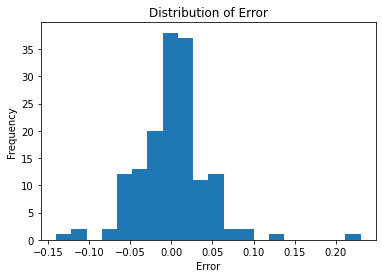

-6.493506493506481e-05


In [292]:
X=XX_CPI
y=df['CPI']
variable=y
model=model1
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df[XX_CPI.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
from sklearn.metrics import mean_absolute_error as MAE
output=y_pred
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
error=(result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

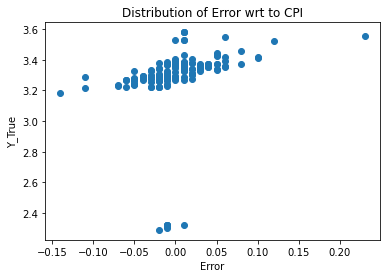

In [293]:
plt.scatter(result['Error'],result['Y_True'])
plt.title('Distribution of Error wrt to CPI')
plt.xlabel('Error')
plt.ylabel('Y_True')
plt.show()

 2.183 87
Result (Test)
MAE : 1.43128


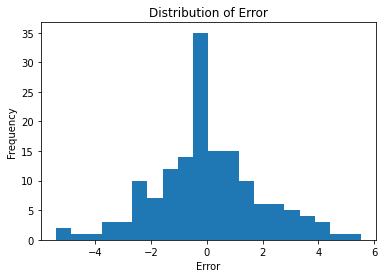

6.493506493506427e-05


In [294]:
X=XX_DPI
y=df['DPI']
variable=y
model=model1
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df[XX_DPI.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
from sklearn.metrics import mean_absolute_error as MAE
output=y_pred
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
error=(result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

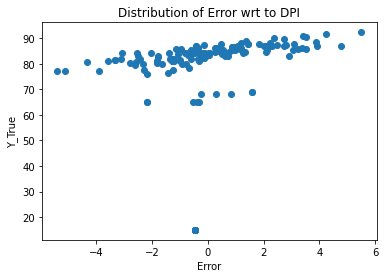

In [295]:
plt.scatter(result['Error'],result['Y_True'])
plt.title('Distribution of Error wrt to DPI')
plt.xlabel('Error')
plt.ylabel('Y_True')
plt.show()

 0.037 88
Result (Test)
MAE : 0.02858


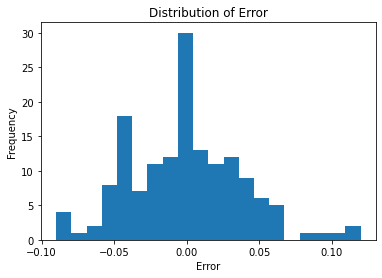

-0.00019480519480519489


In [296]:
X=XX_EC
y=df['EC']
variable=y
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df[XX_EC.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
from sklearn.metrics import mean_absolute_error as MAE
output=y_pred
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
error=(result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

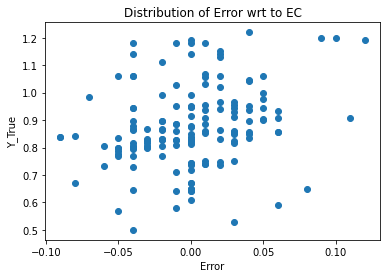

In [297]:
plt.scatter(result['Error'],result['Y_True'])
plt.title('Distribution of Error wrt to EC')
plt.xlabel('Error')
plt.ylabel('Y_True')
plt.show()

 0.383 90
Result (Test)
MAE : 0.31628


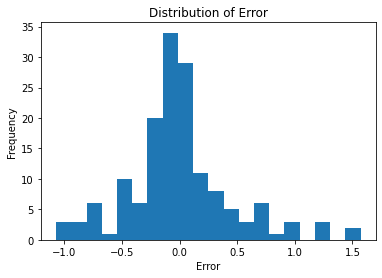

0.00038961038961038565


In [298]:
X=XX_WC
y=df['WC']
variable=y
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df[XX_WC.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
from sklearn.metrics import mean_absolute_error as MAE
output=y_pred
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
error=(result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

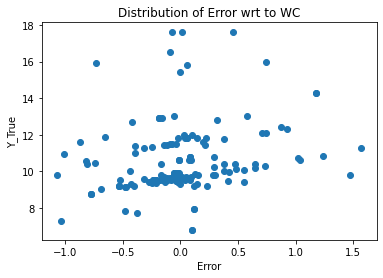

In [299]:
plt.scatter(result['Error'],result['Y_True'])
plt.title('Distribution of Error wrt to WC')
plt.xlabel('Error')
plt.ylabel('Y_True')
plt.show()

 3.010 100
Result (Test)
MAE : 2.80485


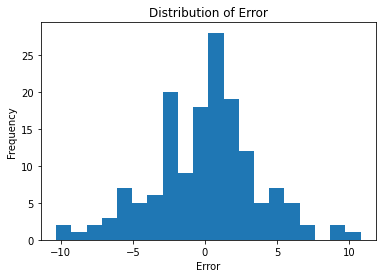

-0.0003896103896106351


In [300]:
X=XX_T
y=df['T']
variable=y
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df[XX_T.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
from sklearn.metrics import mean_absolute_error as MAE
output=y_pred
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
error=(result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

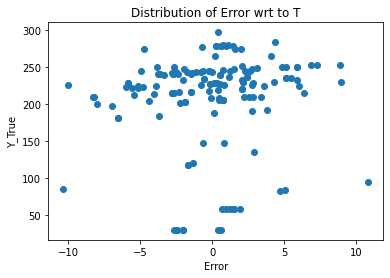

In [301]:
plt.scatter(result['Error'],result['Y_True'])
plt.title('Distribution of Error wrt to T')
plt.xlabel('Error')
plt.ylabel('Y_True')
plt.show()

# DIGITAL TWIN LABORATORY

In [307]:
df_dt = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/train_digital_twin.xlsx')

In [308]:
df_dt

,modelname,type,typem,k1,k2,k3,k4,k5,k6,k7,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,E395P320S_AA - Eco 50 - Solo,15,60,E,3,9,5,P,3,2,...,0,0,0,0,10,78,1,0,0,0
1,E295C323S_AA - Eco 50 - Solo,15,60,E,2,9,5,C,3,2,...,0,0,0,0,10,93,0,0,0,0
2,E295F329S - Eco 50 - Solo,15,60,E,2,9,5,F,3,2,...,0,0,0,0,10,93,0,0,0,0
3,E596P3DDS_AA,16,60,E,5,9,6,P,3,D,...,0,0,0,0,50,57,1,30,0,0
4,E596A3IIS_AA,16,60,E,5,9,6,A,3,I,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,E295C320A_AB - Eco 50 NR - Ank.,15,60,E,2,9,5,C,3,2,...,0,0,0,0,10,98,0,0,0,0
137,E394P320A_AA - Eco 50 - Ank,14,60,E,3,9,4,P,3,2,...,0,0,0,0,10,78,1,0,0,0
138,E295C320S_AB - Eco 50 NR - Solo,15,60,E,2,9,5,C,3,2,...,0,0,0,0,10,98,0,0,0,0
139,E394G329S_AA - Eco 50 NR - Solo,14,60,E,3,9,4,G,3,2,...,0,0,0,0,10,103,0,33,0,0


In [309]:
XX_CPI=['1OYSum of kapalı', '1OYSum of CIRC_TIME', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYMax of DEVIR', '2AYMax of TEMP',
       '3MFTSum of SURE', '4SGDSum of SURE', '4SGDMax of DEVIR',
       '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C', '8DSBMax of DEVIR',
       '10KUSum of FAN', '10KUSum of KAPI ACMA', '10KUSum of GAUDI_offset']
XX_DPI=['1OYMax of TEMP', '2AYSum of SURE', '2AYSum of TEPE_C', '4SGDSum of WI',
       '10KUSum of FAN / KLAPE']
XX_EC=['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYSum of ALT_C', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYMax of TEMP', '2AYSum of ALT_C', '2AYSum of TEPE_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA']
XX_T=['1OYSum of SURE', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of ALT_C', '4SGDSum of WI',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '8DSBSum of kapalı',
       '10KUSum of SURE']
XX_WC=['1OYSum of kapalı', '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP',
       '2AYSum of kapalı', '2AYSum of WI', '2AYMax of DEVIR',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Sum of ALT_C', '8DSBSum of kapalı', '10KUSum of SURE',
       '10KUSum of GAUDI_offset']

In [310]:
XX_CPI=df_dt[XX_CPI]
XX_DPI=df_dt[XX_DPI]
XX_EC=df_dt[XX_EC]
XX_T=df_dt[XX_T]
XX_WC=df_dt[XX_WC]

In [311]:
model1=GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 50, max_depth = 4)
model2=LinearRegression()

In [312]:
df_dt_test = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/test_digital_twin.xlsx')

In [317]:
X=XX_CPI
y=df_dt['CPI']
variable=y
model=model1
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df_dt_test[XX_CPI.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
variable=df_dt_test['CPI']

 0.047 84


In [318]:
variable

0     3.266000
1     3.270000
2     2.320000
3     3.530000
4     3.330000
5     3.270000
6     3.341975
7     3.292000
8     3.300662
9     3.358667
10    3.550000
11    3.230864
12    3.224277
Name: CPI, dtype: float64

In [319]:
y_pred

,0
0,3.337674
1,3.328661
2,2.325438
3,3.525523
4,3.322164
5,3.328661
6,3.329535
7,3.320316
8,3.347950
9,3.322164


In [320]:
X=XX_DPI
y=df_dt['DPI']
model=model1
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df_dt_test[XX_DPI.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
variable=df_dt_test['DPI']

 2.326 85


In [321]:
variable

0     83.230000
1     65.000000
2     15.000000
3     84.000000
4     91.666667
5     65.000000
6     85.390947
7     85.666667
8     84.105960
9     87.000000
10    80.000000
11    86.316872
12    85.260116
Name: DPI, dtype: float64

In [322]:
y_pred

,0
0,83.201520
1,68.527898
2,15.421699
3,84.584770
4,86.790316
5,68.527898
6,84.371330
7,87.200686
8,86.158970
9,86.790316


In [334]:
X=XX_WC
y=df_dt['WC']
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df_dt_test[XX_WC.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
variable=df_dt_test['WC']

 0.370 90


In [335]:
variable

0      8.750000
1     10.600000
2     10.800000
3     17.600000
4      9.683333
5     10.800000
6     11.443333
7     11.586000
8     12.113333
9      9.500000
10    12.000000
11    10.726667
12    11.285000
Name: WC, dtype: float64

In [336]:
y_pred

,0
0,9.578718
1,10.530893
2,10.605511
3,17.694556
4,9.676126
5,10.530893
6,11.568383
7,11.295020
8,11.282734
9,9.676126


In [329]:
X=XX_EC
y=df_dt['EC']
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df_dt_test[XX_EC.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
variable=df_dt_test['EC']

 0.040 88


In [330]:
variable

0     0.884200
1     1.060000
2     0.640000
3     1.180000
4     0.947000
5     1.060000
6     0.830000
7     0.944000
8     1.046000
9     0.951622
10    0.864750
11    0.861667
12    0.906000
Name: EC, dtype: float64

In [331]:
y_pred

,0
0,0.898666
1,1.110877
2,0.642050
3,1.226714
4,0.947254
5,1.110877
6,0.831088
7,0.991506
8,1.009416
9,0.966573


In [337]:
X=XX_T
y=df_dt['T']
model=model2
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1),  100*mean(scores3)))
df_test_ref=df_dt_test[XX_T.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
variable=df_dt_test['T']

 3.008 100


In [338]:
variable

0     240.000000
1      58.000000
2      30.000000
3     148.000000
4     209.666667
5      58.000000
6     181.000000
7     215.400000
8     226.000000
9     220.000000
10    210.000000
11    227.666667
12    252.500000
Name: T, dtype: float64

In [339]:
y_pred

,0
0,242.735732
1,56.349518
2,32.576921
3,147.580163
4,218.035086
5,56.349518
6,188.066537
7,218.290229
8,223.326996
9,218.035086


### HYPERPARAMETER TUNING

### hyperparameter tuning of CPI

In [341]:
XX=XX_CPI
y=df_dt['CPI']

In [342]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer
from pprint import pprint
from sklearn.metrics import mean_pinball_loss

param_grid = dict(
    learning_rate=[0.05, 0.1, 0.2],
    max_depth=[2, 5, 10],
    min_samples_leaf=[1, 5, 10, 20],
    min_samples_split=[5, 10, 20, 30, 50],
)
alpha = 0.05
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(XX, y)
pprint(search_05p.best_params_)

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 150}


In [343]:
model=GradientBoostingRegressor(learning_rate= 0.05, max_depth= 2, min_samples_leaf= 5,
                                        min_samples_split= 20, n_estimators= 150)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.050 82.803


In [344]:
model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.043 84.345


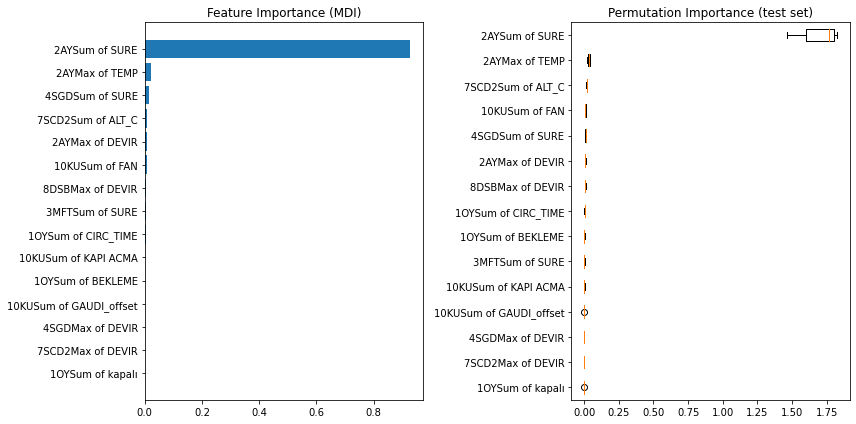

In [345]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(XX.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, XX, y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(XX.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### hyperparameter tuning of DPI

In [346]:
XX=XX_DPI
y=df_dt['DPI']

In [347]:
param_grid = dict(
    learning_rate=[0.05, 0.1, 0.2],
    max_depth=[2, 5, 10],
    min_samples_leaf=[1, 5, 10, 20],
    min_samples_split=[5, 10, 20, 30, 50],
)
alpha = 0.05
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(XX, y)
pprint(search_05p.best_params_)

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}


In [348]:
model=GradientBoostingRegressor(learning_rate= 0.2, max_depth= 2, min_samples_leaf= 5,
                                        min_samples_split= 5, n_estimators= 150)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.710 77.343


In [349]:
model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.187 79.193


since we can not see any improvement we do not report the hyperparameter tuning 

# MODELS 

In [390]:
y_CPI = df_ver_0['CPI']
y_DPI = df_ver_0['DPI']
y_EC=df_ver_0['EC']
y_T=df_ver_0['T']
y_WC=df_ver_0['WC']

In [391]:
var_data=['T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [384]:
var_DE=[ '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYSum of CIRC_TIME', '2AYSum of WI',
       '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '4SGDSum of SURE',
       '4SGDSum of CIRC_TIME', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE']

In [392]:
y=y_CPI
XX=df_ver_0[var_data]

model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

XX=df_ver_0[var_DE]
model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.045 84.102
 0.052 84.173
 0.051 82.201
 0.058 80.694


In [393]:
y=y_DPI
XX=df_ver_0[var_data]

model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

XX=df_ver_0[var_DE]
model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.453 77.888
 2.803 77.499
 2.559 74.069
 2.830 75.650


In [394]:
y=y_T
XX=df_ver_0[var_data]

model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

XX=df_ver_0[var_DE]
model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.499 99.601
 1.637 99.771
 6.270 97.674
 5.514 98.575


In [395]:
y=y_WC
XX=df_ver_0[var_data]

model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

XX=df_ver_0[var_DE]
model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.099 98.964
 0.097 98.908
 0.655 72.995
 0.702 66.149


In [396]:
y=y_EC
XX=df_ver_0[var_data]

model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

XX=df_ver_0[var_DE]
model=XGBRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.052 79.469
 0.047 84.149
 0.051 80.303
 0.047 83.865
